In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel(r"C:\Users\dell\Downloads\Airlines+Data (1).xlsx")

In [3]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
date = pd.DataFrame(pd.date_range(start = '1995-01-01', end = '2002-12-31', freq = '1M'), columns = ["Month"])

In [5]:
s=pd.concat([date,data.drop('Month',axis=1)],axis=1)

In [6]:
s

,Month,Passengers
0,1995-01-31,112
1,1995-02-28,118
2,1995-03-31,132
3,1995-04-30,129
4,1995-05-31,121
...,...,...
91,2002-08-31,405
92,2002-09-30,355
93,2002-10-31,306
94,2002-11-30,271


In [8]:
m=s.set_index('Month')

In [9]:
m

,Passengers
Month,
1995-01-31,112
1995-02-28,118
1995-03-31,132
1995-04-30,129
1995-05-31,121
...,...
2002-08-31,405
2002-09-30,355
2002-10-31,306


In [10]:
m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-31 to 2002-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


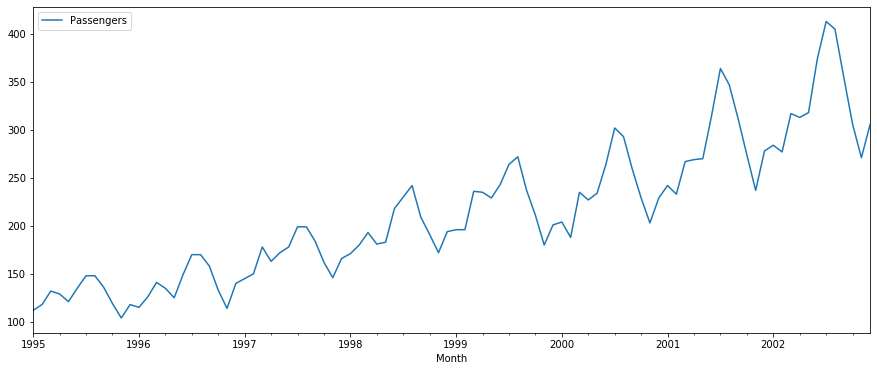

In [11]:
import matplotlib.pyplot as plt
m.plot(figsize=(15, 6))
plt.show()

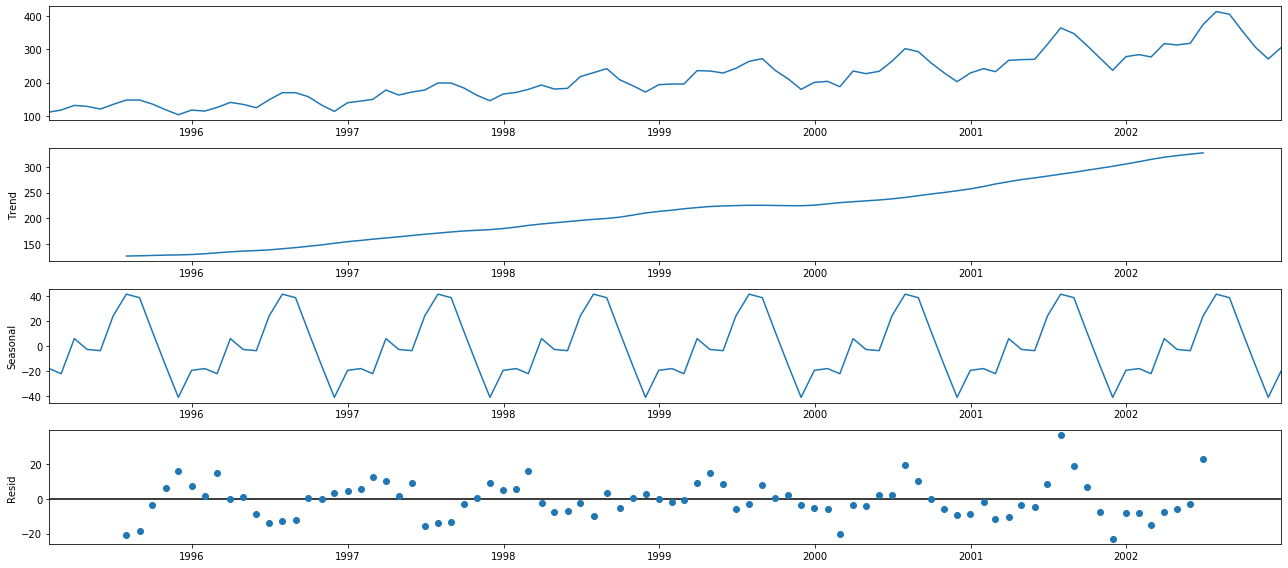

In [12]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(m, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue   

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:1301.7158787856208


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1145.396860587297
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:973.5880903596487


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:907.000766056883
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:985.0903602090475


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:900.2201830293733
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:927.1110143666523


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:932.9339356040422


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1167.8912769954368


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:1019.0146647903368


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:879.5648275636178


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:819.5698219930063


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:900.1664402288172


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:826.3561520931568


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:848.6133208012978


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:843.4193810697168
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:861.8673044488423


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:819.0463590497606
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:908.9741702192639


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:798.0501853709652
ARIMA(0, 1, 0)x(1, 0, 0, 4)4 - AIC:829.6533923107365


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 4)4 - AIC:826.5975914407808


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 4)4 - AIC:860.7151798809172


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 4)4 - AIC:781.9244766706681


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 4)4 - AIC:845.6792110691712


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 4)4 - AIC:804.6072677072688
ARIMA(0, 1, 1)x(0, 1, 0, 4)4 - AIC:892.4563480595997

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 4)4 - AIC:783.2282558409694


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 4)4 - AIC:823.2742137093087


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 4)4 - AIC:812.6605297506153


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 4)4 - AIC:853.4121282442846


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 4)4 - AIC:769.1778111800259
ARIMA(1, 0, 0)x(0, 0, 0, 4)4 - AIC:871.9928112321581


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 4)4 - AIC:828.2061075265041
ARIMA(1, 0, 0)x(0, 1, 0, 4)4 - AIC:908.3864388315544


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 4)4 - AIC:807.1128939338739
ARIMA(1, 0, 0)x(1, 0, 0, 4)4 - AIC:830.6992209711746

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 4)4 - AIC:836.9805699925049
ARIMA(1, 0, 0)x(1, 1, 0, 4)4 - AIC:851.0319321054682


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 4)4 - AIC:792.8882399901199
ARIMA(1, 0, 1)x(0, 0, 0, 4)4 - AIC:856.2120808151216


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 4)4 - AIC:814.5693853271569


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 4)4 - AIC:869.670912871412


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 4)4 - AIC:790.8442453681521


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 4)4 - AIC:824.9275776713886


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 4)4 - AIC:813.7832978604854


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 4)4 - AIC:832.1923641341332


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 4)4 - AIC:779.3803141401502
ARIMA(1, 1, 0)x(0, 0, 0, 4)4 - AIC:857.5706802865593


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 4)4 - AIC:816.6251234658331
ARIMA(1, 1, 0)x(0, 1, 0, 4)4 - AIC:904.1130309608462


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 4)4 - AIC:793.9530187781799
ARIMA(1, 1, 0)x(1, 0, 0, 4)4 - AIC:818.2245579327121


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 4)4 - AIC:824.3676593857494
ARIMA(1, 1, 0)x(1, 1, 0, 4)4 - AIC:846.0541377688623


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 4)4 - AIC:779.1053987597177
ARIMA(1, 1, 1)x(0, 0, 0, 4)4 - AIC:844.6480502078624


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 4)4 - AIC:805.1136919580492


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 4)4 - AIC:878.4139331913269


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 4)4 - AIC:783.2962767365062


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 4)4 - AIC:815.9230720954016


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 4)4 - AIC:807.5508428286787


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 4)4 - AIC:835.5156919321583


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 4)4 - AIC:771.1166382671208


In [15]:
mod = sm.tsa.statespace.SARIMAX(m,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1063      0.398     -0.267      0.789      -0.886       0.674
ma.L1          0.3642      0.406      0.897      0.369      -0.431       1.160
ar.S.L4       -0.4660      0.130     -3.595      0.000      -0.720      -0.212
ma.S.L4       -1.0000   2121.744     -0.000      1.000   -4159.542    4157.542
sigma2       397.6486   8.44e+05      0.000      1.000   -1.65e+06    1.65e+06


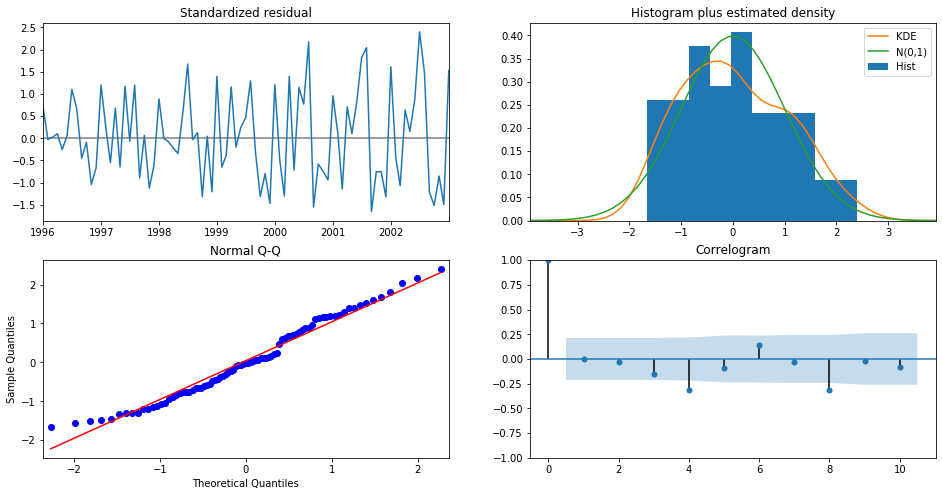

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

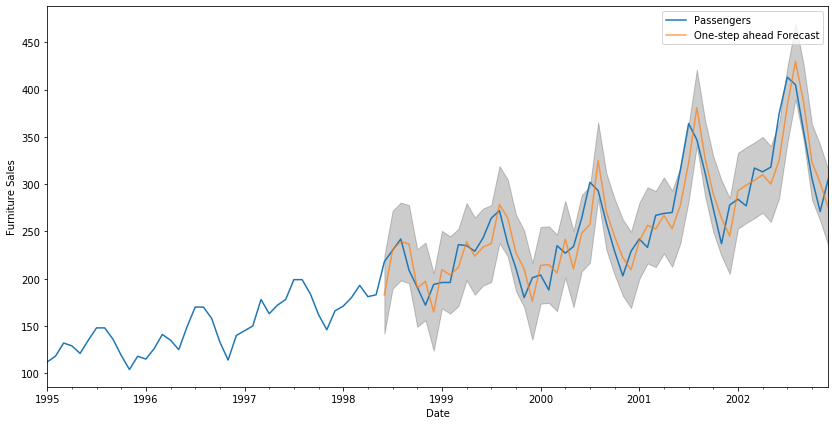

In [17]:
pred = results.get_prediction(start=pd.to_datetime('1998-06-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = m['1995':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [18]:
pred.predicted_mean

1998-06-30    182.833062
1998-07-31    230.637510
1998-08-31    239.339376
1998-09-30    236.557597
1998-10-31    190.078378
1998-11-30    197.201982
1998-12-31    164.797500
1999-01-31    209.611145
1999-02-28    203.986934
1999-03-31    211.857452
1999-04-30    239.189399
1999-05-31    223.853983
1999-06-30    233.425880
1999-07-31    237.145047
1999-08-31    278.376113
1999-09-30    264.269194
1999-10-31    227.503913
1999-11-30    210.396657
1999-12-31    176.059104
2000-01-31    214.098643
2000-02-29    214.872938
2000-03-31    206.172400
2000-04-30    241.842168
2000-05-31    210.312256
2000-06-30    248.134538
2000-07-31    257.269479
2000-08-31    324.952399
2000-09-30    270.975537
2000-10-31    244.440716
2000-11-30    222.319368
2000-12-31    209.358965
2001-01-31    239.735414
2001-02-28    256.444066
2001-03-31    252.502688
2001-04-30    266.896992
2001-05-31    252.837541
2001-06-30    277.766803
2001-07-31    322.188668
2001-08-31    380.875145
2001-09-30    327.514147


In [19]:
y_forecasted = pred.predicted_mean

In [20]:
y_truth = m['1998-06-30':]

In [21]:
y=pd.DataFrame((y_forecasted),index=y_truth.index)

In [22]:
y_truth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1998-06-30 to 2002-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [30]:
y.index

DatetimeIndex(['1998-06-30', '1998-07-31', '1998-08-31', '1998-09-30',
               '1998-10-31', '1998-11-30', '1998-12-31', '1999-01-31',
               '1999-02-28', '1999-03-31', '1999-04-30', '1999-05-31',
               '1999-06-30', '1999-07-31', '1999-08-31', '1999-09-30',
               '1999-10-31', '1999-11-30', '1999-12-31', '2000-01-31',
               '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
               '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
               '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30',
               '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31',
               '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31',
               '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30',
               '2002-10-31', '2002-11-30', '2002-12-31'],
              dtype

In [31]:
y_truth.index

DatetimeIndex(['1998-06-30', '1998-07-31', '1998-08-31', '1998-09-30',
               '1998-10-31', '1998-11-30', '1998-12-31', '1999-01-31',
               '1999-02-28', '1999-03-31', '1999-04-30', '1999-05-31',
               '1999-06-30', '1999-07-31', '1999-08-31', '1999-09-30',
               '1999-10-31', '1999-11-30', '1999-12-31', '2000-01-31',
               '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
               '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
               '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30',
               '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31',
               '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31',
               '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30',
               '2002-10-31', '2002-11-30', '2002-12-31'],
              dtype

In [32]:
mse = ((y - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Passengers    552.81
dtype: float64


In [25]:
y_truth

,Passengers
Month,
1998-06-30,218
1998-07-31,230
1998-08-31,242
1998-09-30,209
1998-10-31,191
1998-11-30,172
1998-12-31,194
1999-01-31,196
1999-02-28,196


In [26]:
y.columns=['Passengers']

In [27]:
y

,Passengers
Month,
1998-06-30,182.833062
1998-07-31,230.637510
1998-08-31,239.339376
1998-09-30,236.557597
1998-10-31,190.078378
1998-11-30,197.201982
1998-12-31,164.797500
1999-01-31,209.611145
1999-02-28,203.986934


In [33]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is Passengers    23.51
dtype: float64


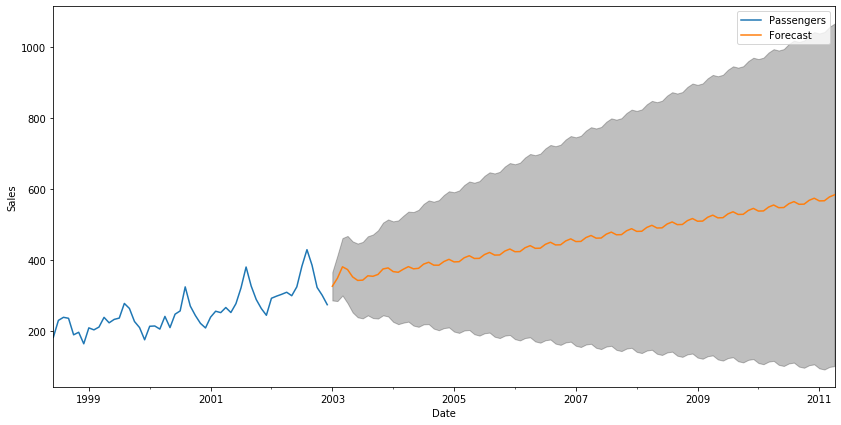

In [34]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()